<center>
<img src="https://cdn.megabonus.com/images/shop_logo/skillbox.png"/>
# Курс аналитик данных на Python  

## 2.2. Pandas basics.

[**Pandas**](http://pandas.pydata.org/pandas-docs/stable/) это пакет для статистической обработки данных, по функциональности близкий к R. <br>
Основные типы объектов это **Series** (~ вектор как в numpy с индексацией) и **DataFrame** (классическая таблица как мы ее знаем с индексацией)

In [2]:
import numpy as np
import pandas as pd

## Series

`Series` в это одномерный набор данных, по сути дела вектор.<br> 
Сгенерируем данные, пускай это будут показатели температуры на термометре за эту неделю<br>
Отсутствующий данные записываются как `np.nan` (в этот день мы забыли записать показания или в нашем термометре села батарейка).<br>
Пропущенные значения это по сути `None` и не участвуют в вычислении средних, среднеквадратичных отклонений и т.д.<br>

In [3]:
l = [15,11,16,np.nan,14,13,12]
s = pd.Series(l)
s

0    15.0
1    11.0
2    16.0
3     NaN
4    14.0
5    13.0
6    12.0
dtype: float64

In [4]:
type(s)

pandas.core.series.Series


Основная информация о наборе данных: среднее, среднеквадратичное отклонение, минимум, максимум, медиана (которая отличается от среднего для несимметричных распределений).

In [5]:
s.describe()

count     6.000000
mean     13.500000
std       1.870829
min      11.000000
25%      12.250000
50%      13.500000
75%      14.750000
max      16.000000
dtype: float64

Можем проиндексироваться по нашему массиву.

In [6]:
s

0    15.0
1    11.0
2    16.0
3     NaN
4    14.0
5    13.0
6    12.0
dtype: float64

In [7]:
s[5]

np.float64(13.0)

Можем исправить свои показания, тк выяснилось что мы ошиблись и 11 должно быть 17.

In [10]:
s[2]=16
s

0    15.0
1    17.0
2    16.0
3     NaN
4    14.0
5    13.0
6    12.0
dtype: float64

Можем сделать срез, выбрать некое количество значений.

In [9]:
s[2:5]

2    17.0
3     NaN
4    14.0
dtype: float64

Можем создать новый объект без первого значения и без последнего.

In [11]:
s

0    15.0
1    17.0
2    16.0
3     NaN
4    14.0
5    13.0
6    12.0
dtype: float64

In [17]:
s1=s[1:]
s1

1    17.0
2    16.0
3     NaN
4    14.0
5    13.0
6    12.0
dtype: float64

In [16]:
s2=s[:-1]
s2

0    15.0
1    17.0
2    16.0
3     NaN
4    14.0
5    13.0
dtype: float64


В сумме `s1+s2` складываются данные с одинаковыми индексами. Поскольку в `s1` нет данного и индексом 0, а в `s2` - с индексом 5, в `s1+s2` в соответствующих позициях будет `NaN`. Однако смысла в такой операции тоже нет.

In [19]:
s1+s2

0     NaN
1    34.0
2    32.0
3     NaN
4    28.0
5    26.0
6     NaN
dtype: float64

К **Series** можно применять функции из `numpy`. 

**P.S.** Логарифм числа (например по основанию 2) это степень в которое нужно возвести основание, чтобы получить искомое число.

In [20]:
np.log2(s)

0    3.906891
1    4.087463
2    4.000000
3         NaN
4    3.807355
5    3.700440
6    3.584963
dtype: float64

Проверим себя, возведем полученное число в степень.

In [21]:
s

0    15.0
1    17.0
2    16.0
3     NaN
4    14.0
5    13.0
6    12.0
dtype: float64

In [22]:
pow(2,3.700440)

13.000002539806442

При создании набора данных s мы не указали, что будет играть роль индекса. По умолчанию это последовательность целых чисел 0, 1, 2, ...

In [23]:
list(s.index)

[0, 1, 2, 3, 4, 5, 6]


Но можно создавать наборы данных с индексом, заданным списком.

In [30]:
i = list('abcdefg')
i

['a', 'b', 'c', 'd', 'e', 'f', 'g']

In [31]:
s = pd.Series(l,index=i)
s

a    15.0
b    11.0
c    16.0
d     NaN
e    14.0
f    13.0
g    12.0
dtype: float64

И независимо от значений в индексе, мы можем индексироваться.

In [33]:
s['c']

np.float64(16.0)

Если индекс - строка, то вместо s['c'] можно индексироваться через точку.

In [34]:
s.c

np.float64(16.0)

Набор данных можно создать из словаря.

In [35]:
s = pd.Series({'a':1,'b':2,'c':0})
s

a    1
b    2
c    0
dtype: int64


Можно отсортировать набор данных.

In [37]:
s.sort_values()

c    0
a    1
b    2
dtype: int64

Роль индекса может играть, скажем, последовательность дат (или времён измерения и т.д.).

In [38]:
d = pd.date_range('20181012',periods=10)
d

DatetimeIndex(['2018-10-12', '2018-10-13', '2018-10-14', '2018-10-15',
               '2018-10-16', '2018-10-17', '2018-10-18', '2018-10-19',
               '2018-10-20', '2018-10-21'],
              dtype='datetime64[ns]', freq='D')

Сгенерируем данные из нормального распределения.

In [39]:
s = pd.Series(np.random.normal(size=10),index=d)
s

2018-10-12   -0.066851
2018-10-13    0.517799
2018-10-14    1.215134
2018-10-15    1.096402
2018-10-16   -0.036600
2018-10-17    0.549168
2018-10-18    0.336413
2018-10-19    1.792655
2018-10-20    0.617521
2018-10-21   -0.787467
Freq: D, dtype: float64

Можем сравненивать возвращают наборы булевых данных.

In [41]:
s > 0

2018-10-12    False
2018-10-13     True
2018-10-14     True
2018-10-15     True
2018-10-16    False
2018-10-17     True
2018-10-18     True
2018-10-19     True
2018-10-20     True
2018-10-21    False
Freq: D, dtype: bool

Если такой булев набор использовать для индексации, получится поднабор только из тех данных, для которых условие есть True.

In [42]:
s[s > 0]

2018-10-13    0.517799
2018-10-14    1.215134
2018-10-15    1.096402
2018-10-17    0.549168
2018-10-18    0.336413
2018-10-19    1.792655
2018-10-20    0.617521
dtype: float64

Кумулятивные максимумы измеряют максимум от первого элемента до текущего, представте плавающее окно, которое каждый раз добавляет по одной дате и ищет максимум среди получившегося массива.

In [44]:
s

2018-10-12   -0.066851
2018-10-13    0.517799
2018-10-14    1.215134
2018-10-15    1.096402
2018-10-16   -0.036600
2018-10-17    0.549168
2018-10-18    0.336413
2018-10-19    1.792655
2018-10-20    0.617521
2018-10-21   -0.787467
Freq: D, dtype: float64

In [43]:
s.cummax()

2018-10-12   -0.066851
2018-10-13    0.517799
2018-10-14    1.215134
2018-10-15    1.215134
2018-10-16    1.215134
2018-10-17    1.215134
2018-10-18    1.215134
2018-10-19    1.792655
2018-10-20    1.792655
2018-10-21    1.792655
Freq: D, dtype: float64


Кумулятивные суммы.

In [45]:
s = s.cumsum()
s

2018-10-12   -0.066851
2018-10-13    0.450948
2018-10-14    1.666082
2018-10-15    2.762484
2018-10-16    2.725884
2018-10-17    3.275053
2018-10-18    3.611465
2018-10-19    5.404120
2018-10-20    6.021641
2018-10-21    5.234174
Freq: D, dtype: float64

Построим график наших данных. <br>
Для этого нам понадобится библиотека `matplotlib` и волшебная команда `%matplotlib inline` чтобы выводились только графики.

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

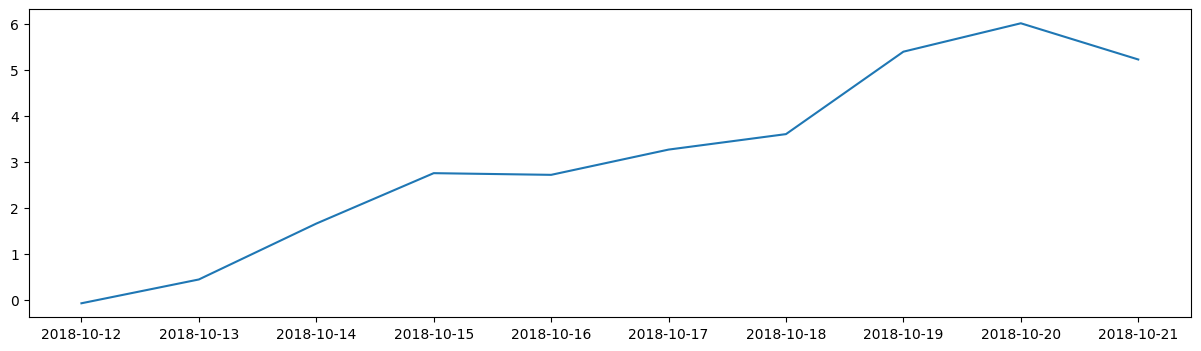

In [47]:
plt.figure(figsize=(15,4))
plt.plot(s)

## DataFrame

`DataFrame` это двумерная таблица данных. <br>
Имеет индекс и набор столбцов (возможно, имеющих разные типы). <br>
Таблицу можно построить, например, из словаря, значениями в котором являются одномерные наборы данных.

In [48]:
d={'one':pd.Series([1,2,3],index=['a','b','c']),
   'two':pd.Series([1,2,3,4],index=['a','b','c','d'])}
df=pd.DataFrame(d)
df

,one,two
a,1.0,1
b,2.0,2
c,3.0,3
d,NaN,4


In [32]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [33]:
df.columns

Index(['one', 'two'], dtype='object')

Если в качестве индекса указать имя столбца, получится одномерный набор данных.

In [34]:
df['one']

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [49]:
df.two

a    1
b    2
c    3
d    4
Name: two, dtype: int64

In [36]:
df['one']['c']

3.0


Однако если указать диапазон индексов, то это означает диапазон строк. Причём последняя строка включается в таблицу.

In [37]:
df

,one,two
a,1.0,1
b,2.0,2
c,3.0,3
d,NaN,4


In [38]:
df['b':'d']

,one,two
b,2.0,2
c,3.0,3
d,NaN,4



Диапазон целых чисел даёт диапазон строк с такими номерами, не включая последнюю строку (как обычно при индексировании списков). Всё это кажется довольно нелогичным.

In [50]:
df[1:3]

,one,two
b,2.0,2
c,3.0,3



Логичнее работает атрибут `loc`: первая позиция - всегда индекс строки, а вторая - название столбца.

In [40]:
df.loc['b']

one    2.0
two    2.0
Name: b, dtype: float64

In [41]:
df

,one,two
a,1.0,1
b,2.0,2
c,3.0,3
d,NaN,4


In [42]:
df.loc['b','one']

2.0

In [43]:
df.loc['a':'b','one']

a    1.0
b    2.0
Name: one, dtype: float64

In [54]:
df.loc['a':'b',:]

,one,two
a,1.0,1
b,2.0,2


In [45]:
df.loc[:,'one']

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

К таблице можно добавлять новые столбцы.

In [55]:
df['three']=df['one']*df['two']
df['flag']=df['two']>2
df

,one,two,three,flag
a,1.0,1,1.0,False
b,2.0,2,4.0,False
c,3.0,3,9.0,True
d,NaN,4,NaN,True


Также можно удалять имеющиеся.

In [56]:
del df['two']
df['foo']=0.
df

,one,three,flag,foo
a,1.0,1.0,False,0.0
b,2.0,4.0,False,0.0
c,3.0,9.0,True,0.0
d,NaN,NaN,True,0.0



Добавим копию столбца `one`, в которую входят только строки до второй.

In [57]:
df['one_tr']=df['one'][:2]
df

,one,three,flag,foo,one_tr
a,1.0,1.0,False,0.0,1.0
b,2.0,4.0,False,0.0,2.0
c,3.0,9.0,True,0.0,NaN
d,NaN,NaN,True,0.0,NaN


In [58]:
df=df.loc[:,['one','one_tr']]
df

,one,one_tr
a,1.0,1.0
b,2.0,2.0
c,3.0,NaN
d,NaN,NaN


Можно объединять таблицы по вертикали и по горизонтали.

In [59]:
df2=pd.DataFrame({'one':{'e':0,'f':1},'one_tr':{'e':2}})
df2

,one,one_tr
e,0,2.0
f,1,NaN


Объединим по столбцам.

In [60]:
pd.concat([df,df2], axis=0)

,one,one_tr
a,1.0,1.0
b,2.0,2.0
c,3.0,NaN
d,NaN,NaN
e,0.0,2.0
f,1.0,NaN


In [61]:
df2=pd.DataFrame({'two':{'a':0,'b':1},'three':{'c':2,'d':3}})
df2

,two,three
a,0.0,NaN
b,1.0,NaN
c,NaN,2.0
d,NaN,3.0


Объединим по строкам.

In [62]:
pd.concat([df,df2],axis=1)

,one,one_tr,two,three
a,1.0,1.0,0.0,NaN
b,2.0,2.0,1.0,NaN
c,3.0,NaN,NaN,2.0
d,NaN,NaN,NaN,3.0



Создадим таблицу из массива случайных чисел.

In [67]:
df=pd.DataFrame(np.random.randn(10,4),
                columns=['A','B','C','D'])
df

,A,B,C,D
0,1.230579,-0.074476,0.137419,0.046569
1,-0.185014,-0.181301,0.654758,0.253328
2,0.707067,0.844055,-0.482993,-0.550465
3,0.131918,-1.481118,0.537062,0.814495
4,0.295891,-1.586612,0.043112,-1.563964
5,0.800939,-1.338488,1.641356,0.244952
6,0.417872,-1.453222,0.957172,0.460486
7,0.397083,0.403679,0.455823,0.401019
8,1.396787,-0.787574,0.199487,-0.119386
9,0.257230,0.844836,0.413528,-2.354733


In [69]:
df2=pd.DataFrame(np.random.randn(7,3),columns=['A','B','C'])
df+df2

,A,B,C,D
0,0.838220,0.262246,-1.188615,NaN
1,0.713934,0.014494,0.803817,NaN
2,0.935061,1.885765,0.342960,NaN
3,-2.295953,-2.233354,0.560445,NaN
4,0.157791,0.637323,-0.711968,NaN
5,1.358468,-1.978003,1.285174,NaN
6,1.075874,-0.556082,2.401353,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


Прошу заметить, что объекты **не изменяются пока мы их не перезапишем в явном виде**, например: `df = df+df2`

In [71]:
df

,A,B,C,D
0,1.230579,-0.074476,0.137419,0.046569
1,-0.185014,-0.181301,0.654758,0.253328
2,0.707067,0.844055,-0.482993,-0.550465
3,0.131918,-1.481118,0.537062,0.814495
4,0.295891,-1.586612,0.043112,-1.563964
5,0.800939,-1.338488,1.641356,0.244952
6,0.417872,-1.453222,0.957172,0.460486
7,0.397083,0.403679,0.455823,0.401019
8,1.396787,-0.787574,0.199487,-0.119386
9,0.257230,0.844836,0.413528,-2.354733


In [72]:
2*df+3

,A,B,C,D
0,5.461158,2.851048,3.274838,3.093138
1,2.629971,2.637397,4.309515,3.506656
2,4.414133,4.688110,2.034015,1.899070
3,3.263835,0.037765,4.074125,4.628990
4,3.591783,-0.173225,3.086223,-0.127928
5,4.601877,0.323024,6.282712,3.489904
6,3.835743,0.093557,4.914343,3.920973
7,3.794166,3.807358,3.911646,3.802038
8,5.793573,1.424852,3.398975,2.761228
9,3.514460,4.689671,3.827057,-1.709467


In [73]:
df.describe()

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,0.545035,-0.481022,0.455672,-0.236770
std,0.491460,0.974591,0.569951,0.994989
min,-0.185014,-1.586612,-0.482993,-2.354733
25%,0.266896,-1.424538,0.152936,-0.442695
50%,0.407477,-0.484438,0.434676,0.145761
75%,0.777471,0.284140,0.625334,0.364096
max,1.396787,0.844836,1.641356,0.814495


Можем отсортировать по значениям в колонке.

In [74]:
df.sort_values(by='C')

,A,B,C,D
2,0.707067,0.844055,-0.482993,-0.550465
4,0.295891,-1.586612,0.043112,-1.563964
0,1.230579,-0.074476,0.137419,0.046569
8,1.396787,-0.787574,0.199487,-0.119386
9,0.257230,0.844836,0.413528,-2.354733
7,0.397083,0.403679,0.455823,0.401019
3,0.131918,-1.481118,0.537062,0.814495
1,-0.185014,-0.181301,0.654758,0.253328
6,0.417872,-1.453222,0.957172,0.460486
5,0.800939,-1.338488,1.641356,0.244952


Атрибут iloc подобен loc: первый индекс - индекс строки, второй - индекс столбца. Это целые числа, конец диапазона на включается (как обычно в питоне).

In [75]:
df.iloc[2]

A    0.707067
B    0.844055
C   -0.482993
D   -0.550465
Name: 2, dtype: float64

In [76]:
df.iloc[1:3, 0:2]

,A,B
1,-0.185014,-0.181301
2,0.707067,0.844055


In [77]:
df.iloc[1:3,0:2]

,A,B
1,-0.185014,-0.181301
2,0.707067,0.844055


Посчитаем кумулятивные суммы.

In [78]:
cs=df.cumsum()
cs

,A,B,C,D
0,1.230579,-0.074476,0.137419,0.046569
1,1.045565,-0.255778,0.792176,0.299897
2,1.752631,0.588277,0.309184,-0.250568
3,1.884549,-0.892840,0.846246,0.563927
4,2.180441,-2.479453,0.889358,-1.000037
5,2.981379,-3.817941,2.530713,-0.755085
6,3.399251,-5.271163,3.487885,-0.294599
7,3.796334,-4.867484,3.943708,0.106420
8,5.193121,-5.655057,4.143195,-0.012966
9,5.450351,-4.810222,4.556724,-2.367699


In [87]:
cs.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

И построим график.

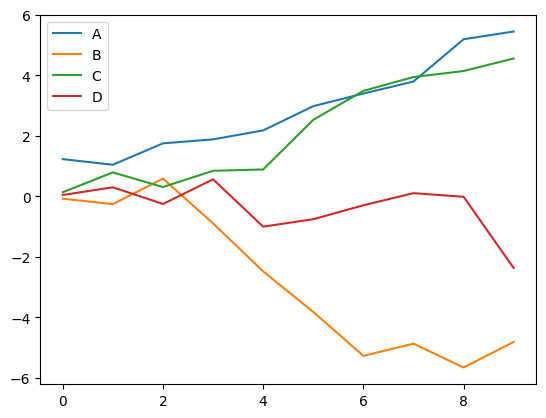

In [88]:
plt.plot(cs)
plt.legend(cs.columns)

## Чтение файлов

Так как основная форма обмена информации это таблицы, то нужно научиться загружать их и записывать.<br>
В `Pandas` есть удобные методы для чтения`.read_csv()`/`.read_excel()`/`.read_table()` и `.to_csv()`/`.to_excel()`

Прочитаем файл и вглянем на его.

In [89]:
data = pd.read_csv('../data/bank.csv',sep=';')

In [90]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [93]:
data = pd.read_excel('../data/bikes_rent.xls')

In [72]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,cnt
0,1,0,1,0,6,0,2,985
1,1,0,1,0,0,0,2,801
2,1,0,1,0,1,1,1,1349
3,1,0,1,0,2,1,1,1562
4,1,0,1,0,3,1,1,1600


Создами колонку с кумулятивной суммой поездок.

In [94]:
data['cum_sum'] = data['cnt'].cumsum()

In [95]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,cnt,cum_sum
0,1,0,1,0,6,0,2,985,985
1,1,0,1,0,0,0,2,801,1786
2,1,0,1,0,1,1,1,1349,3135
3,1,0,1,0,2,1,1,1562,4697
4,1,0,1,0,3,1,1,1600,6297


Перезапишем наш файл.

In [96]:
data.to_csv('../data/bikes_rent.csv', index=False)

С запись в экселевский формат немного длиннее. Сначало нам нужно создать объект, который будет записывать файл и в него передать нашу таблицу.

In [98]:
writer = pd.ExcelWriter('bikes_rent.xlsx')
data.to_excel(writer, sheet_name ='bikes_rent_sheet')